<a href="https://colab.research.google.com/github/vansh1612/EDA_21BDS0202/blob/main/21BDS0202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded Successfully!

   rownames  Anger Gender         item     resp  id  btype   situ  mode r2
0         1     20      M  S1WantCurse       no   1  curse  other  want  N
1         2     11      M  S1WantCurse       no   2  curse  other  want  N
2         3     17      F  S1WantCurse  perhaps   3  curse  other  want  Y
3         4     21      F  S1WantCurse  perhaps   4  curse  other  want  Y
4         5     17      F  S1WantCurse  perhaps   5  curse  other  want  Y

🧾 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  7584 non-null   int64 
 1   Anger     7584 non-null   int64 
 2   Gender    7584 non-null   object
 3   item      7584 non-null   object
 4   resp      7584 non-null   object
 5   id        7584 non-null   int64 
 6   btype     7584 non-null   object
 7   situ      7584 non-null   object
 8   mode     

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


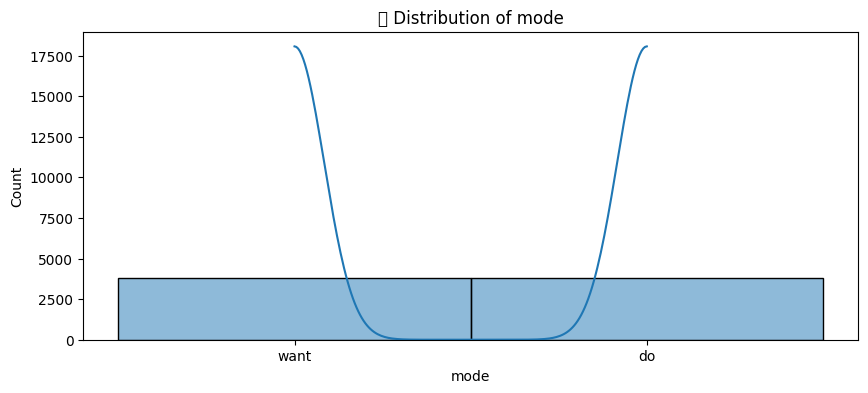

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


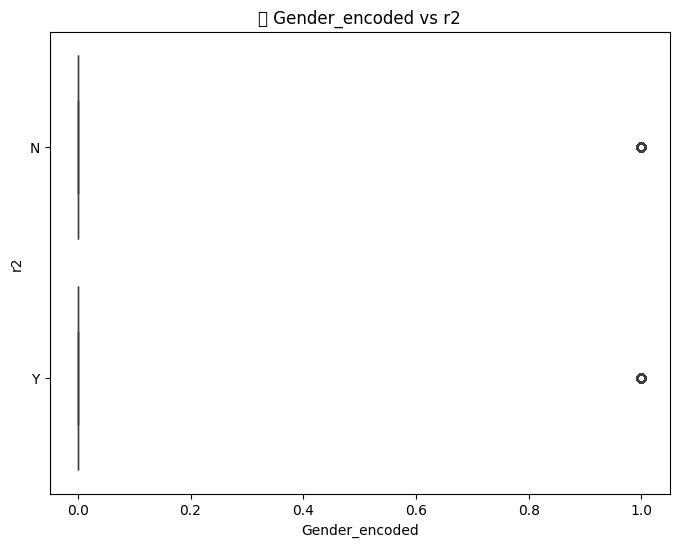

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


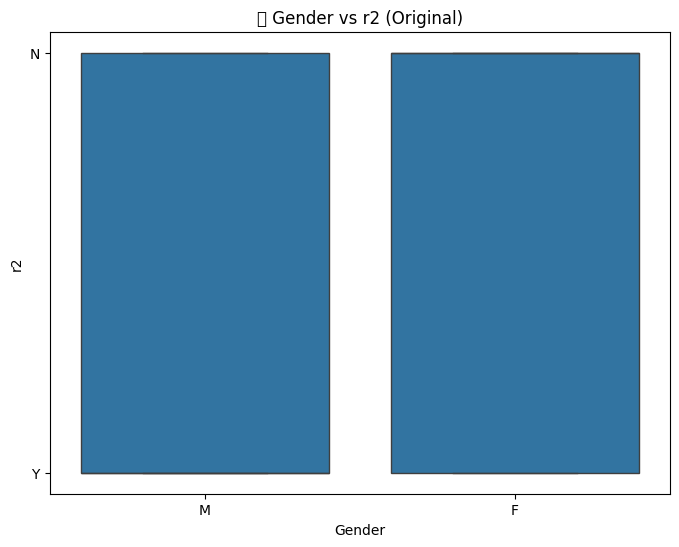

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


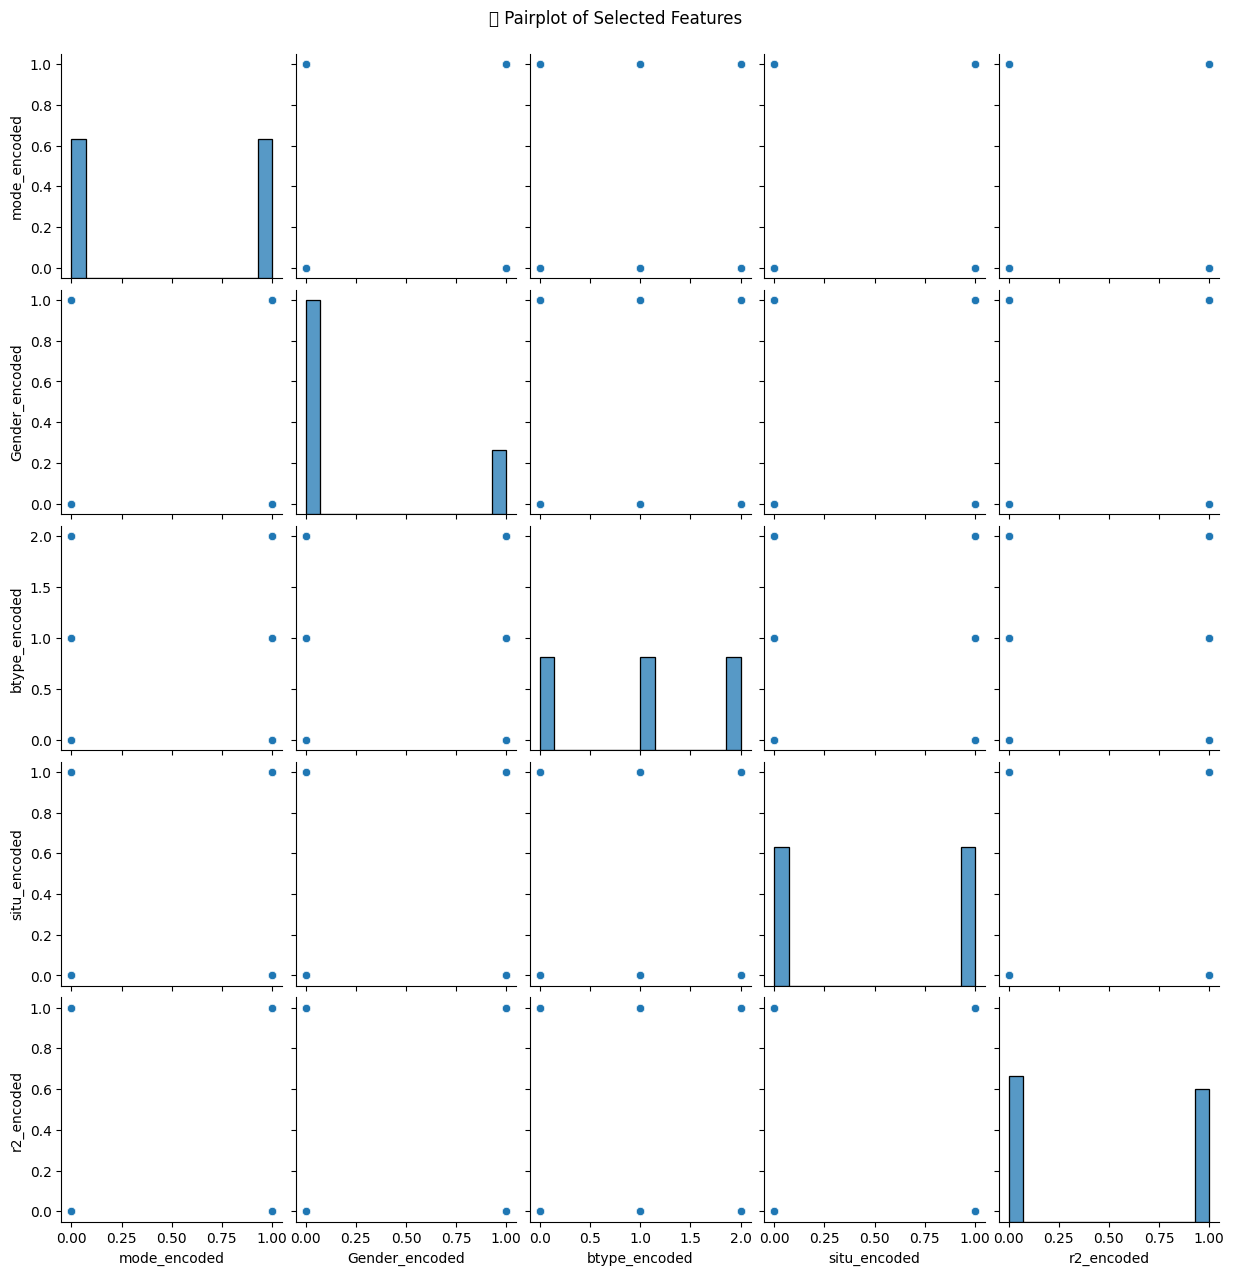


⏰ Time Columns Check:
Index([], dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


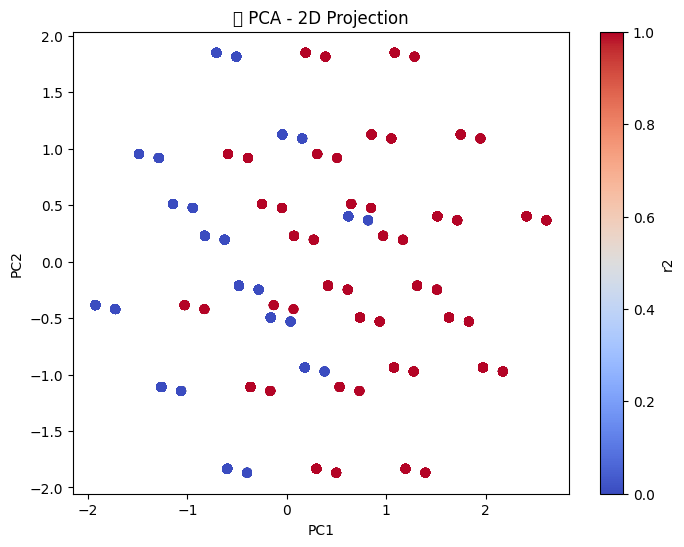


✅ Confusion Matrix:
 [[803   0]
 [  0 714]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       803
           1       1.00      1.00      1.00       714

    accuracy                           1.00      1517
   macro avg       1.00      1.00      1.00      1517
weighted avg       1.00      1.00      1.00      1517


✅ Accuracy Score: 1.0


In [13]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 📥 Load Dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/VerbAgg.csv"
df = pd.read_csv(url)
print("✅ Dataset Loaded Successfully!\n")
print(df.head())

# 📊 Basic Info
print("\n🧾 Dataset Info:")
df.info()

print("\n🔍 Missing Values:")
print(df.isnull().sum())

# ✅ Data Cleaning
df.dropna(inplace=True)

# 🔁 Label Encoding categorical columns
le = LabelEncoder()
categorical_columns = ['Gender', 'mode', 'btype', 'situ', 'resp']

for col in categorical_columns:
    if col in df.columns:
        df[col + '_encoded'] = le.fit_transform(df[col])
        print(f"✅ Encoded {col} -> {col}_encoded")
    else:
        print(f"⚠️ Column {col} not found in dataset.")

# 📈 1D Visualization
plt.figure(figsize=(10, 4))
sns.histplot(df['mode'], kde=True)
plt.title('📊 Distribution of mode')
plt.show()

# 📊 2D Visualization using encoded Gender
if 'Gender_encoded' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender_encoded', y='r2', data=df)
    plt.title('🧍 Gender_encoded vs r2')
    plt.show()
else:
    print("⚠️ Gender_encoded column not found for boxplot.")

# Optional: Original Gender boxplot
if 'Gender' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender', y='r2', data=df)
    plt.title('🧍 Gender vs r2 (Original)')
    plt.show()

# 🧩 N-D Visualization using Pairplot
# Use only numeric or encoded columns
pairplot_cols = ['mode_encoded', 'Gender_encoded', 'btype_encoded', 'situ_encoded']
if 'r2' in df.columns:
    # Encode r2 if it's categorical
    df['r2_encoded'] = le.fit_transform(df['r2'])
    pairplot_cols.append('r2_encoded')

sns.pairplot(df[pairplot_cols])
plt.suptitle('🔗 Pairplot of Selected Features', y=1.02)
plt.show()

# ⏱️ Time-Series Check
print("\n⏰ Time Columns Check:")
print(df.columns[df.columns.str.contains('date|time', case=False)])

# 📐 PCA for Dimensionality Reduction
features = df.select_dtypes(include=[np.number]).drop(columns=['r2_encoded', 'Anger', 'id', 'rownames'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['r2_encoded'], cmap='coolwarm')
plt.title('📉 PCA - 2D Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='r2')
plt.show()

# 🔨 Model Building
X = features
y = df['r2_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 📊 Model Evaluation
y_pred = model.predict(X_test)

print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))
